<h1 style="line-height:50px;;background:#9eb5db;border-radius:15px;height:50px;text-align:center;border:2px ridge;
color:white;">Inferential Statistics</h1>

<div style="background:#9eb5db;border-radius:15px;"><h2 style="line-height:50px;height:50px;margin-left:20px">Requirements
</h2></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import mannwhitneyu

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="background:#9eb5db;border-radius:15px;"><h2 style="line-height:50px;height:50px;margin-left:20px">Problem
</h2></div>

In [2]:
# Read Dataset

df = pd.read_csv('mibilegame.csv')

In [3]:
# Split Data

df_gate_30 = df[df['version'] == 'gate_30']
df_gate_40 = df[df['version'] == 'gate_40']

In [4]:
# Calculate Mean

gate_30_game_round = df_gate_30['sum_gamerounds'].mean()
gate_40_game_round = df_gate_40['sum_gamerounds'].mean()
total_game_round = df['sum_gamerounds'].mean()
print(f'mean of sum_gamerounds in df is {total_game_round}')
print(f'mean of sum_gamerounds in df_gate_40 is {gate_40_game_round}')
print(f'mean of sum_gamerounds in df_gate_30 is {gate_30_game_round}')

mean of sum_gamerounds in df is 51.8724567297564
mean of sum_gamerounds in df_gate_40 is 51.29877552814966
mean of sum_gamerounds in df_gate_30 is 52.45626398210291


Shapiro-Wilk test results: statistic = 0.1441, p-value = 0.0000


/opt/conda/lib/python3.10/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


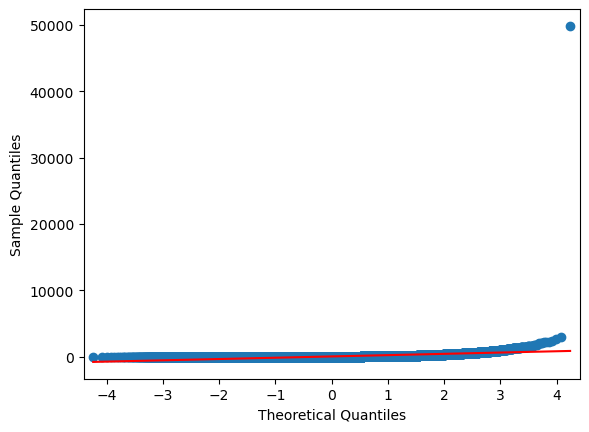

As it is seen from p-value in shapiro test less than 0.05 and slope of q-q plot isn't closer to 1 
distribuiton of data isn't noraml,it's mean we can't use t-test for calculate p-value.


In [5]:
# Calculate Data Distribution 

# because number of your data is greater than 5000 we use q-q plot to be sure. 

sum_gamerounds = df['sum_gamerounds']
stat, p = shapiro(sum_gamerounds)
print("Shapiro-Wilk test results: statistic = {:.4f}, p-value = {:.4f}".format(stat, p))
qqplot(sum_gamerounds, line='s')
plt.show()
print("""As it is seen from p-value in shapiro test less than 0.05 and slope of q-q plot isn't closer to 1 
distribuiton of data isn't noraml,it's mean we can't use t-test for calculate p-value.""")

In [6]:
# Calculate P-Value with U-Test

sum_gamerounds_gate_30 = df_gate_30['sum_gamerounds']
sum_gamerounds_gate_40 = df_gate_40['sum_gamerounds']

stat, p_value = mannwhitneyu(sum_gamerounds_gate_30, sum_gamerounds_gate_40, alternative='two-sided')
print("Mann-Whitney U test results: statistic = {}, p-value = {}".format(stat, p_value))

Mann-Whitney U test results: statistic = 1024331250.5, p-value = 0.05020880772044255


In [7]:
# Make Decision

if p_value < 0.1:
    print(f"Seeing ads reduced the average sum game round by {gate_30_game_round-gate_40_game_round}.")
else:
    print("doesn't meaningful difference")

Seeing ads reduced the average sum game round by 1.157488453953249.
